In [ ]:
# Подгрузка всех необходимых модулей
import torch
import torchvision
import torchvision.transforms as transforms
import torchvision.datasets as datasets
import matplotlib.pyplot as plt
import numpy as np
import torch.nn as nn
import torch.nn.functional as F
import torch.optim as optim
from torch.utils.data import DataLoader
from google.colab import drive
import seaborn as sns

In [ ]:
import matplotlib
from sklearn.metrics import classification_report
from torch.utils.data import random_split
from torch.utils.data import DataLoader
from torchvision.transforms import ToTensor
from torchvision.datasets import KMNIST
from torch.optim import Adam
from torch import nn
import matplotlib.pyplot as plt
import numpy as np
import argparse
import torch
import time

In [ ]:
device = 'cuda' if torch.cuda.is_available() else 'cpu'
device

'cuda'

In [1]:
# ! pip install -q kaggle
# from google.colab import files

# files.upload()
# ! mkdir kaggle
# ! cp kaggle.json kaggle/
# ! chmod 600 ~/.kaggle/kaggle.json
# ! kaggle datasets download -d l33tc0d3r/indian-food-classification
# ! unzip indian-food-classification -d kaggle

In [2]:
# from google.colab import files

# files.upload()

Saving kaggle.json to kaggle.json


{'kaggle.json': b'{"username":"gorodovleonid","key":"b3ef76f9fd7ef73e4dfda3ac021fe29f"}'}

/content


In [ ]:
drive.mount("/content/drive/", force_remount=True)

Mounted at /content/drive/


In [ ]:
# %ls
%cd "/content/drive/MyDrive/Colab_Notebooks"
# %cd 'Colab_Notebooks'

/content/drive/MyDrive/Colab_Notebooks


In [ ]:
# %ls test

burger/       chole_bhature/  idli/          kulfi/        pakode/
butter_naan/  dal_makhani/    jalebi/        masala_dosa/  pav_bhaji/
chai/         dhokla/         kaathi_rolls/  momos/        pizza/
chapati/      fried_rice/     kadai_paneer/  paani_puri/   samosa/


/usr/local/lib/python3.10/dist-packages/torchvision/transforms/functional.py:1603: UserWarning: The default value of the antialias parameter of all the resizing transforms (Resize(), RandomResizedCrop(), etc.) will change from None to True in v0.17, in order to be consistent across the PIL and Tensor backends. To suppress this warning, directly pass antialias=True (recommended, future default), antialias=None (current default, which means False for Tensors and True for PIL), or antialias=False (only works on Tensors - PIL will still use antialiasing). This also applies if you are using the inference transforms from the models weights: update the call to weights.transforms(antialias=True).
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/torchvision/transforms/functional.py:1603: UserWarning: The default value of the antialias parameter of all the resizing transforms (Resize(), RandomResizedCrop(), etc.) will change from None to True in v0.17, in order to be consistent across th

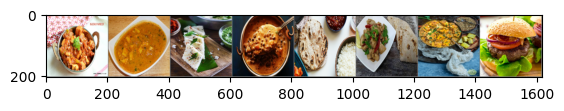

In [ ]:
transform = transforms.Compose([transforms.ToTensor(), transforms.Resize((200,200)), transforms.Normalize(0.5, 0.5)]) # Задаем параметры для преобразований в тензоры
train_dataset = torchvision.datasets.ImageFolder('./dataset/Dataset/train', transform=transform) # формируем датасет для обучения
test_dataset = torchvision.datasets.ImageFolder('./test', transform=transform) # формируем датасет для валидации

batch_size = 8

trainloader = torch.utils.data.DataLoader(train_dataset, batch_size=batch_size,
                                          shuffle=True, num_workers=2)
testloader = torch.utils.data.DataLoader(test_dataset, batch_size=batch_size,
                                         shuffle=False, num_workers=2)
classes = ('burger',
           'butter_naan',
           'chai',
           'chapati',
           'chole_bhature',
           'dal_makhani',
           'dhokla',
           'fried_rice',
           'idli',
           'jalebi',
           'kaathi_rolls',
           'kadai_paneer',
           'kulfi',
           'masala_dosa',
           'momos',
           'paani_puri',
           'pakode',
           'pav_bhaji',
           'pizza',
           'samosa')
# SUMMARY 20 CLASSES

# функция для показа изображения
def imshow(img):
    img = img  / 2  + 0.5
    npimg = img.numpy()
    plt.imshow(np.transpose(npimg, (1, 2, 0)))
    plt.show()


# получаем несколько случайных обучающих изображений
dataiter = iter(trainloader)
images, labels = next(dataiter)

# показать изображения
imshow(torchvision.utils.make_grid(images))
# показать лейблы изображений
print(' '.join(f'{classes[labels[j]]:5s}' for j in range(batch_size)))

In [ ]:
from torchvision.models import efficientnet
model = efficientnet.efficientnet_b0(pretrained=True)
model.classifier[1] = nn.Linear(1280, 20)
model.to(device);

kadai_paneer kadai_paneer dhokla dal_makhani chapati chapati kadai_paneer burger


/usr/local/lib/python3.10/dist-packages/torchvision/models/_utils.py:208: UserWarning: The parameter 'pretrained' is deprecated since 0.13 and may be removed in the future, please use 'weights' instead.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/torchvision/models/_utils.py:223: UserWarning: Arguments other than a weight enum or `None` for 'weights' are deprecated since 0.13 and may be removed in the future. The current behavior is equivalent to passing `weights=EfficientNet_B0_Weights.IMAGENET1K_V1`. You can also use `weights=EfficientNet_B0_Weights.DEFAULT` to get the most up-to-date weights.
  warnings.warn(msg)
Downloading: "https://download.pytorch.org/models/efficientnet_b0_rwightman-3dd342df.pth" to /root/.cache/torch/hub/checkpoints/efficientnet_b0_rwightman-3dd342df.pth
100%|██████████| 20.5M/20.5M [00:00<00:00, 83.7MB/s]


In [ ]:
!pip install pytorch.ignite

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 266.8/266.8 kB 6.6 MB/s eta 0:00:00


In [ ]:
from ignite.engine import Events, create_supervised_trainer, create_supervised_evaluator
from ignite.metrics import Accuracy, Loss, RunningAverage, ConfusionMatrix
from ignite.handlers import ModelCheckpoint, EarlyStopping
from ignite.contrib.handlers import ProgressBar, HandlersTimeProfiler
from ignite.handlers import Checkpoint, global_step_from_engine

In [ ]:
# Define the transforms for the training and testing sets
train_transforms = transforms.Compose([
    transforms.Resize((224,224)),
    transforms.ToTensor(),
    transforms.Normalize((0.5,0.5,0.5), (0.5,0.5,0.5)),
])

test_transforms = transforms.Compose([
    transforms.Resize((224, 224)),
    transforms.ToTensor(),
    transforms.Normalize((0.5,0.5,0.5), (0.5,0.5,0.5))
])

# Load the training and testing datasets
trainset = torchvision.datasets.ImageFolder(root='./dataset/Dataset/train', transform=train_transforms)
trainloader = torch.utils.data.DataLoader(trainset, batch_size=16, shuffle=True)

testset = torchvision.datasets.ImageFolder(root='./test', transform=test_transforms)
testloader = torch.utils.data.DataLoader(testset, batch_size=16, shuffle=False)

In [ ]:
criterion = nn.CrossEntropyLoss()
optimizer = optim.Adam(model.parameters(), lr=0.001)

In [ ]:
# Число эпох
epochs = 5
# Движки trainer, evaluator
trainer = create_supervised_trainer(model, optimizer, criterion, device = device)
metrics = {
    'accuracy':Accuracy(),
    'nll':Loss(criterion),
    'cm':ConfusionMatrix(num_classes=20)
}
train_evaluator = create_supervised_evaluator(model, metrics=metrics, device = device)
test_evaluator = create_supervised_evaluator(model, metrics=metrics, device = device)
training_history = {'accuracy':[],'loss':[]}
test_history = {'accuracy':[],'loss':[]}
last_epoch = []

In [ ]:
def score_function(engine):
    test_loss = engine.state.metrics['nll']
    return -test_loss

handler = EarlyStopping(patience=10, score_function=score_function, trainer=trainer)
test_evaluator.add_event_handler(Events.COMPLETED, handler)

In [ ]:
@trainer.on(Events.EPOCH_COMPLETED)
def log_training_results(trainer):
    train_evaluator.run(trainloader)
    metrics = train_evaluator.state.metrics
    accuracy = metrics['accuracy']*100
    loss = metrics['nll']
    last_epoch.append(0)
    training_history['accuracy'].append(accuracy)
    training_history['loss'].append(loss)
    print("Результат обучения - Эпоха: {}  Сред. точность: {:.2f} Сред. ошибка: {:.2f}"
          .format(trainer.state.epoch, accuracy, loss))

def log_test_results(trainer):
    test_evaluator.run(testloader)
    metrics = test_evaluator.state.metrics
    accuracy = metrics['accuracy']*100
    loss = metrics['nll']
    test_history['accuracy'].append(accuracy)
    test_history['loss'].append(loss)
    print("Результат валидации - Эпоха: {}  Сред. точность: {:.2f} Сред. ошибка: {:.2f}"
          .format(trainer.state.epoch, accuracy, loss))

trainer.add_event_handler(Events.EPOCH_COMPLETED, log_test_results)

In [ ]:
@trainer.on(Events.COMPLETED)
def log_confusion_matrix(trainer):
    test_evaluator.run(testloader)
    metrics = test_evaluator.state.metrics
    cm = metrics['cm']
    cm = cm.numpy()
    cm = cm.astype(int)
    classes = ['burger',
           'butter_naan',
           'chai',
           'chapati',
           'chole_bhature',
           'dal_makhani',
           'dhokla',
           'fried_rice',
           'idli',
           'jalebi',
           'kaathi_rolls',
           'kadai_paneer',
           'kulfi',
           'masala_dosa',
           'momos',
           'paani_puri',
           'pakode',
           'pav_bhaji',
           'pizza',
           'samosa']
    fig, ax = plt.subplots(figsize=(10,10))
    ax= plt.subplot()
    sns.heatmap(cm, annot=True, ax = ax,fmt="d")
    # labels, title and ticks
    ax.set_xlabel('Predicted labels')
    ax.set_ylabel('True labels')
    ax.set_title('Confusion Matrix')
    ax.xaxis.set_ticklabels(classes,rotation=90)
    ax.yaxis.set_ticklabels(classes,rotation=0)

In [ ]:
to_save = {'model': model}
handler = Checkpoint(
    to_save, './models5',
    n_saved=2, filename_prefix='best',
    score_name="accuracy",
    global_step_transform=global_step_from_engine(trainer),
)
test_evaluator.add_event_handler(Events.COMPLETED, handler)


In [ ]:
profiler = HandlersTimeProfiler()
profiler.attach(trainer)
pbar = ProgressBar(persist=True,
    bar_format = '')
pbar.attach(trainer, output_transform = lambda x : {"loss" : x})

/usr/local/lib/python3.10/dist-packages/ignite/contrib/handlers/tqdm_logger.py:127: TqdmExperimentalWarning: Using `tqdm.autonotebook.tqdm` in notebook mode. Use `tqdm.tqdm` instead to force console mode (e.g. in jupyter console)
  from tqdm.autonotebook import tqdm


  0%|          | 1/250 [00:00<?, ?it/s]

Результат обучения - Эпоха: 1  Сред. точность: 90.84 Сред. ошибка: 0.30
Результат валидации - Эпоха: 1  Сред. точность: 79.66 Сред. ошибка: 0.70


  0%|          | 1/250 [00:00<?, ?it/s]

Результат обучения - Эпоха: 2  Сред. точность: 93.84 Сред. ошибка: 0.18
Результат валидации - Эпоха: 2  Сред. точность: 83.93 Сред. ошибка: 0.56


  0%|          | 1/250 [00:00<?, ?it/s]

Результат обучения - Эпоха: 3  Сред. точность: 97.90 Сред. ошибка: 0.07
Результат валидации - Эпоха: 3  Сред. точность: 86.84 Сред. ошибка: 0.54


  0%|          | 1/250 [00:00<?, ?it/s]

Результат обучения - Эпоха: 4  Сред. точность: 97.77 Сред. ошибка: 0.08
Результат валидации - Эпоха: 4  Сред. точность: 83.25 Сред. ошибка: 0.59


  0%|          | 1/250 [00:00<?, ?it/s]

Результат обучения - Эпоха: 5  Сред. точность: 96.80 Сред. ошибка: 0.11
Результат валидации - Эпоха: 5  Сред. точность: 78.80 Сред. ошибка: 0.97


State:
	iteration: 1250
	epoch: 5
	epoch_length: 250
	max_epochs: 5
	output: 0.16046106815338135
	batch: <class 'list'>
	metrics: <class 'dict'>
	dataloader: <class 'torch.utils.data.dataloader.DataLoader'>
	seed: <class 'NoneType'>
	times: <class 'dict'>

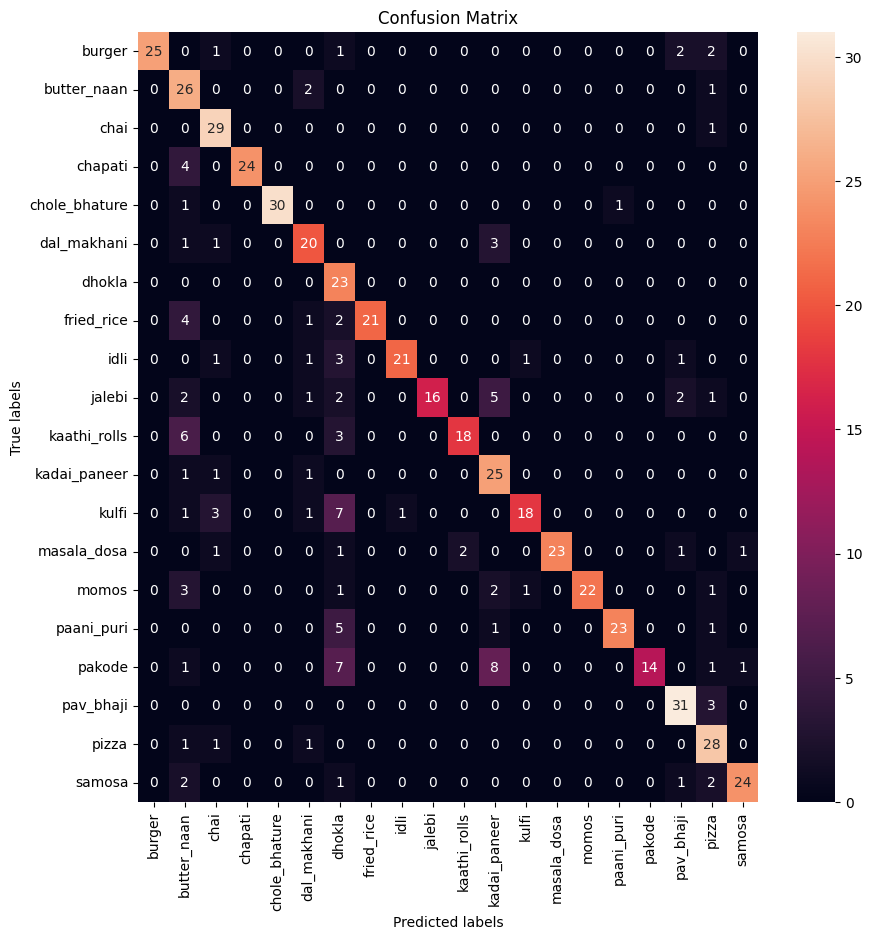

In [ ]:
trainer.run(trainloader, max_epochs=epochs)

In [ ]:
plt.rcParams["figure.figsize"] = (20,10)
plt.plot(training_history['accuracy'],label="Точность на обуч. выборке")
plt.plot(test_history['accuracy'],label="Точность на тест. выборке")
plt.xlabel('№ Эпохи')
plt.ylabel('Точность')
plt.legend(frameon=False)
plt.show()

In [ ]:
# MODEL 2